## Color segmentation. 
Reduce the number of color in the image.

In [5]:
FIGURES_ROOT = './figures'

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

In [40]:
kmeans = KMeans(n_clusters=15)

In [41]:
filenames = os.listdir(FIGURES_ROOT)
filename = filenames[0]
img_path = os.path.join(FIGURES_ROOT, filename)

In [42]:
img = mpimg.imread(img_path)

In [43]:
kmeans.fit(img.reshape(-1, 3))

KMeans(n_clusters=15)

In [44]:
new_img = list(map(lambda x : kmeans.cluster_centers_[x], kmeans.labels_))
new_img = np.array(new_img).astype('uint8').reshape(img.shape)

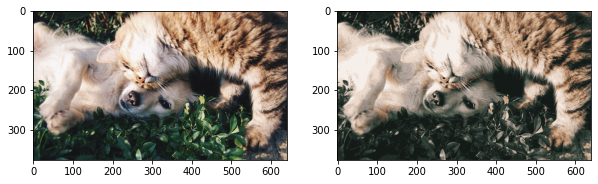

In [45]:
figure = plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(new_img)

## Semi supervised learning  
Try using the clustering to increase the performance of the model.

In [73]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
X, y = fetch_openml(name='mnist_784', version = 1, return_X_y=True)

In [93]:
Xtrain, Xtest = X[:2000], X[2000:]
ytrain, ytest = y[:2000], y[2000:]

In [94]:
lin_clf = LogisticRegression()
scaler = MinMaxScaler()

In [95]:
# try using lin_clf directly
lin_clf.fit(scaler.fit_transform(Xtrain), ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [96]:
lin_clf.score(scaler.transform(Xtest), ytest)

0.8736617647058823

### Preprocess the data using KMeans first

In [97]:
from sklearn.pipeline import Pipeline
n_clusters = 50
kmeans = KMeans(n_clusters=50)

In [98]:
Xtrain_kmean = kmeans.fit_transform(scaler.fit_transform(Xtrain))

In [99]:
new_lin_clf = LogisticRegression()
new_lin_clf.fit(Xtrain_kmean, ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [100]:
new_lin_clf.score(kmeans.transform(scaler.transform(Xtest)), ytest)

0.8507058823529412

In [101]:
pipe = Pipeline([
    ('sclaer', MinMaxScaler()),
    ('kmeans', KMeans(n_clusters = 50)),
    ('predictor', LogisticRegression())
])

In [102]:
from scipy.stats import uniform, randint

params_dist = {'kmeans__n_clusters':randint(1, 784)}
rdcv = RandomizedSearchCV(pipe, params_dist)

In [103]:
rdcv.fit(Xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

RandomizedSearchCV(estimator=Pipeline(steps=[('sclaer', MinMaxScaler()),
                                             ('kmeans', KMeans(n_clusters=50)),
                                             ('predictor',
                                              LogisticRegression())]),
                   param_distributions={'kmeans__n_clusters': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6621e6510>})

In [105]:
rdcv.best_estimator_.score(Xtest, ytest)

0.8523235294117647

In [106]:
rdcv.best_params_

{'kmeans__n_clusters': 110}

In [111]:
import pickle
import joblib
import os

os.makedirs('./saved_model/ch9-unsupervised-learning', exist_ok = True)

In [113]:
with open('./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf-2', 'wb') as f:
    rdcv_serial = pickle.dumps(rdcv)
    f.write(rdcv_serial)

In [110]:
open('./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf')

FileNotFoundError: [Errno 2] No such file or directory: './saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf'

In [112]:
joblib.dump(rdcv, './saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf')

['./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf']

In [115]:
!du -h ./saved_model/ch9-unsupervised-learning/*

732K	./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf
732K	./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf-2


## Limit of Kmeans and introduce to Gaussian mixture

In [13]:
from sklearn.datasets import make_blobs
import numpy as np

In [14]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [10]:
import matplotlib.pyplot as plt

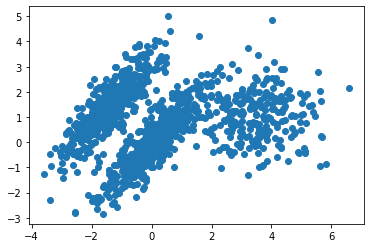

In [16]:
plt.scatter(X[:,0], X[:, 1])

In [17]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [144]:
def plot_decision_boundary(clf, X, xlim = [-4, 7], ylim = [-4, 6], gmm = False):
    
    xs = np.linspace(xlim[0], xlim[1], num = 100)
    ys = np.linspace(ylim[0], ylim[1], num = 100)
    
    xx, yy = np.meshgrid(xs, ys)
    
    x_input = np.c_[np.ravel(xx), np.ravel(yy)]
    y_pred = clf.predict(x_input)
    y_pred = y_pred.reshape(xx.shape)
        
    if not gmm:
        plt.contourf(xx, yy, y_pred, alpha = 0.5)
    else:
        gmm_score = clf.score_samples(x_input).reshape(xx.shape)
        plt.contourf(xx, yy, gmm_score, alpha = 0.5)
        plt.colorbar()


    plt.contour(xx, yy, y_pred)
    plt.scatter(X[:, 0], X[:, 1], s = 5)
    
    if not gmm:
    
        for center in clf.cluster_centers_:
            plt.scatter(center[0], center[1], marker = 'o', s=150)
            plt.scatter(center[0], center[1], marker = 'x', s=100)
    else:
        
        for ind, center in enumerate(clf.means_):
            if clf.weights_[ind] > 0.1*clf.weights_.max():
                plt.scatter(center[0], center[1], marker = 'o', s=150)
                plt.scatter(center[0], center[1], marker = 'x', s=100)
    

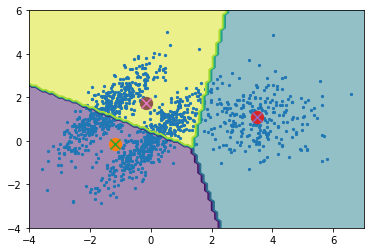

In [145]:
plot_decision_boundary(kmeans, X)

We can cleary see that the above clustering doesn't appropriate for this data.

### Gaussian Mixture Model & Bayesian Gaussina Mixture Model

In [146]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [147]:
gmm = GaussianMixture(n_components = 3, random_state = 42)
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

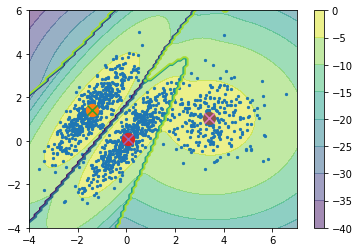

In [148]:
plot_decision_boundary(gmm, X, gmm = True)

In [149]:
gmm.score_samples(X)

array([-2.60767762, -3.57122831, -3.32967056, ..., -3.51338192,
       -4.39814914, -3.80773936])

In [150]:
np.exp(gmm.score_samples(X))

array([0.07370552, 0.02812129, 0.0358049 , ..., 0.02979598, 0.01230008,
       0.0221983 ])

In [151]:
bgmm = BayesianGaussianMixture(n_components=10, n_init = 10, random_state = 42)
bgmm.fit(X)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

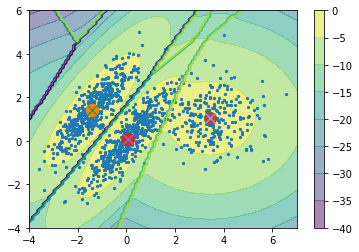

In [152]:
plot_decision_boundary(bgmm, X, gmm = True)

In [153]:
bgmm.weights_

array([4.00988386e-01, 8.53836089e-04, 8.52601349e-04, 8.51368484e-04,
       3.93417696e-01, 2.02955147e-01, 7.36205201e-05, 6.68156657e-06,
       6.07394751e-07, 5.52176179e-08])

# Exercise

## Question 1  
Clustering is the method to grouping the data instances based on its latent structure.  
There are many methods in clustering, such as KMeans, DBSCAN, Gaussian Mixture or Bayesian Gaussian Mixture.


## Question 2  
Color segmentation, image segmentation, customer segmentation or even recommender system.

## Question 3  
It depends on the application.  
If it is segmentation application, there are elbow method, silhouette score and silhouette diagram.  
But if it is for preprocessing application, we usually use GridSearhCV or RandomizedCV to select k based on performance metrics.

## Question 4  
Label propagation is the method for populating the label of the representative instance to the other instances in the same cluster. Note that, first, we have to clustering the unlabel instances. Then labeling the representative of the cluster (representative instances is the instance which is nearest to the centroid).  
We use this method for semi-supervised learning. In which only a few of instances is label, if the model is trained on these few instances, the performance will be bad. Semi-supervised will be very userfule in this case.

## Question 5  
* KMeans and Mini-batch KMeans is quiet fast and can be scaled to large dataset.
* DBSCAN and Gaussian Mixture is the clustering method that directly look for region of high density.

## Question 6  
Active learning will be very useful when there are a lot of unlabel instances. 

## Question 7  
Anomaly detection is the algorithm which is trained on the dataset that might contain. outliers. The goal is to detect the outliers in the existing data, as well as outliers among new instances.  
Novelty detection, in contrast, is trained on the "clean" dataset and the objective is to detect novelties strictly among new instances.

## Question 8  
Gaussian Mixture is the algorithm that assume that the data distribution is consisted of many Gaussian models.  
We can use GMM for clustering, anomaly detection, and density estimation for generating new samples.

## Question 9. 
Information criterion and Bayesian GMM can be used to find the appropriate k cluster.

In [169]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

In [175]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

datasets = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/boonchuay/scikit_learn_data


from urllib.request import urlopen
from shutil import copyfileobj
import os
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

os.makedirs('./datasets/Olivetti', exist_ok=True)

DATA_URL = 'https://ndownloader.figshare.com/files/5976027'

with urlopen(DATA_URL) as in_stream, open('./datasets/Olivetti/dataset', 'wb') as f:
    copyfileobj(in_stream, f)

In [180]:
X, y = datasets['data'], datasets['target']

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Visualize the input

In [216]:
print(X_train.shape)

(320, 4096)


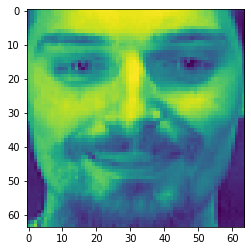

In [218]:
import matplotlib.pyplot as plt

img_num = 70
img_size = (int(4096**0.5), int(4096**0.5))

plt.imshow(X_train[img_num].reshape(img_size))

## Clustering using KMeans

_To speed things up, we will use PCA first_

In [305]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [306]:
X_train_pca.shape

(320, 222)

In [309]:
from sklearn.cluster import KMeans, MiniBatchKMeans

kms = [KMeans(n_clusters = 5*i) for i in range(1,31)]

In [310]:
for i in range(len(kms)):
    kms[i].fit(X_train_pca)

In [314]:
## get inertias for all kmeans 
from sklearn.metrics import silhouette_score
inertias_ = [km.inertia_ for km in kms]
silhouette_scores_ = [silhouette_score(X_train_pca, km.predict(X_train_pca)) for km in kms]
n_clusters = np.arange(1, 31)*5

In [315]:
print(silhouette_scores_)

[0.104777195, 0.09769523, 0.10387691, 0.11534134, 0.12301712, 0.1315506, 0.14533308, 0.14930448, 0.15604678, 0.16551587, 0.17653549, 0.18416415, 0.18001851, 0.19518995, 0.20045516, 0.20801623, 0.20420456, 0.2132009, 0.21447797, 0.2082092, 0.21553454, 0.22415023, 0.2114172, 0.20834538, 0.21543303, 0.22002992, 0.20655997, 0.21963993, 0.20578489, 0.21021509]


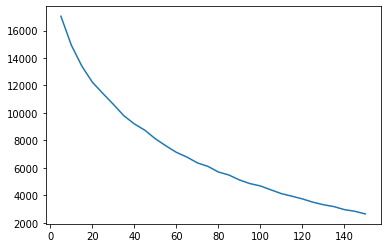

In [316]:
plt.plot(n_clusters, inertias_)

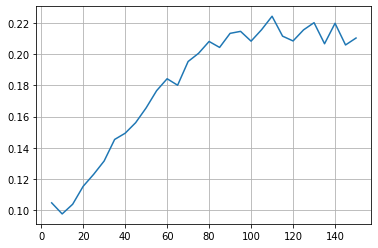

In [317]:
plt.plot(n_clusters, silhouette_scores_)
plt.grid()

**k equal to 110 seems to be the best choice**

In [322]:
best_k = 21

sel_km = kms[best_k]

y_train_newlabel = sel_km.predict(X_train_pca)

In [323]:
import numpy as np

for unique in np.unique(y_train_newlabel):

    print(f'n_clusters {unique} sum  {(y_train_newlabel==unique).sum()}')

n_clusters 0 sum  1
n_clusters 1 sum  6
n_clusters 2 sum  1
n_clusters 3 sum  2
n_clusters 4 sum  5
n_clusters 5 sum  2
n_clusters 6 sum  6
n_clusters 7 sum  2
n_clusters 8 sum  5
n_clusters 9 sum  6
n_clusters 10 sum  3
n_clusters 11 sum  8
n_clusters 12 sum  3
n_clusters 13 sum  5
n_clusters 14 sum  3
n_clusters 15 sum  5
n_clusters 16 sum  2
n_clusters 17 sum  5
n_clusters 18 sum  4
n_clusters 19 sum  6
n_clusters 20 sum  5
n_clusters 21 sum  2
n_clusters 22 sum  4
n_clusters 23 sum  4
n_clusters 24 sum  4
n_clusters 25 sum  9
n_clusters 26 sum  4
n_clusters 27 sum  4
n_clusters 28 sum  2
n_clusters 29 sum  5
n_clusters 30 sum  5
n_clusters 31 sum  4
n_clusters 32 sum  2
n_clusters 33 sum  3
n_clusters 34 sum  3
n_clusters 35 sum  2
n_clusters 36 sum  5
n_clusters 37 sum  2
n_clusters 38 sum  3
n_clusters 39 sum  1
n_clusters 40 sum  3
n_clusters 41 sum  2
n_clusters 42 sum  3
n_clusters 43 sum  4
n_clusters 44 sum  4
n_clusters 45 sum  2
n_clusters 46 sum  3
n_clusters 47 sum  1
n_

n_cluster : 0


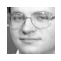

n_cluster : 1


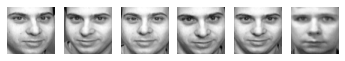

n_cluster : 2


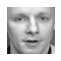

n_cluster : 3


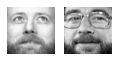

n_cluster : 4


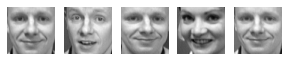

n_cluster : 5


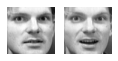

n_cluster : 6


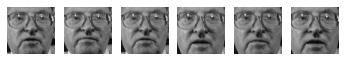

n_cluster : 7


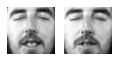

n_cluster : 8


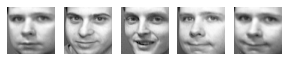

n_cluster : 9


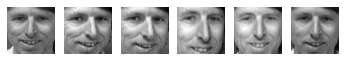

n_cluster : 10


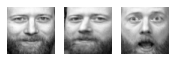

n_cluster : 11


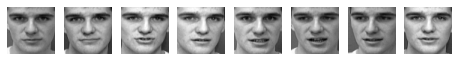

n_cluster : 12


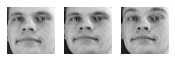

n_cluster : 13


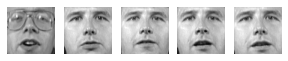

n_cluster : 14


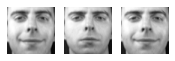

n_cluster : 15


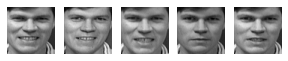

n_cluster : 16


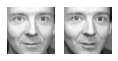

n_cluster : 17


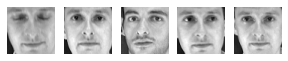

n_cluster : 18


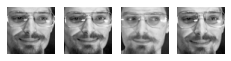

n_cluster : 19


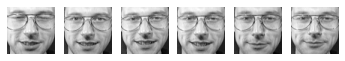

n_cluster : 20


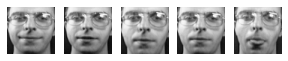

n_cluster : 21


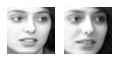

n_cluster : 22


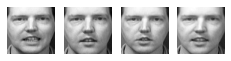

n_cluster : 23


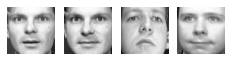

n_cluster : 24


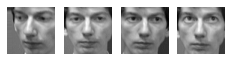

n_cluster : 25


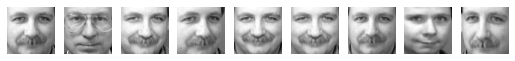

n_cluster : 26


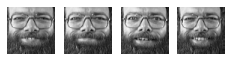

n_cluster : 27


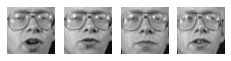

n_cluster : 28


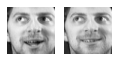

n_cluster : 29


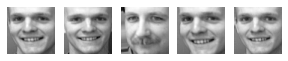

n_cluster : 30


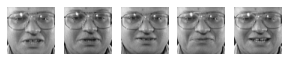

n_cluster : 31


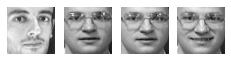

n_cluster : 32


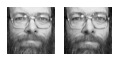

n_cluster : 33


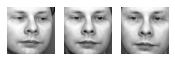

n_cluster : 34


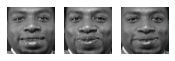

n_cluster : 35


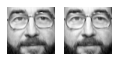

n_cluster : 36


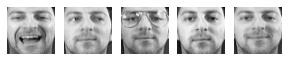

n_cluster : 37


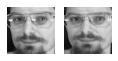

n_cluster : 38


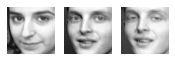

n_cluster : 39


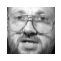

n_cluster : 40


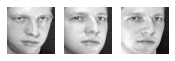

n_cluster : 41


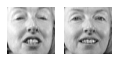

n_cluster : 42


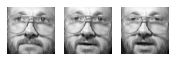

n_cluster : 43


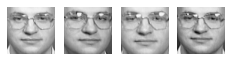

n_cluster : 44


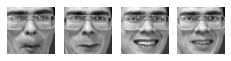

n_cluster : 45


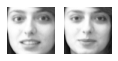

n_cluster : 46


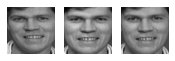

n_cluster : 47


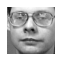

n_cluster : 48


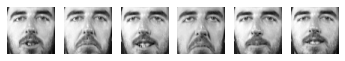

n_cluster : 49


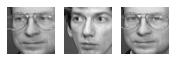

n_cluster : 50


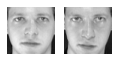

n_cluster : 51


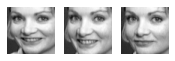

n_cluster : 52


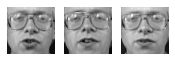

n_cluster : 53


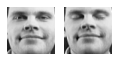

n_cluster : 54


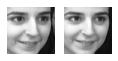

n_cluster : 55


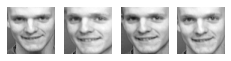

n_cluster : 56


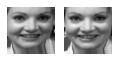

n_cluster : 57


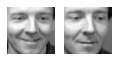

n_cluster : 58


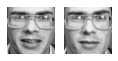

n_cluster : 59


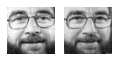

n_cluster : 60


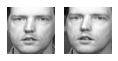

n_cluster : 61


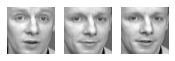

n_cluster : 62


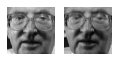

n_cluster : 63


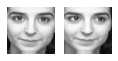

n_cluster : 64


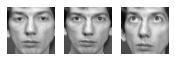

n_cluster : 65


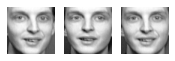

n_cluster : 66


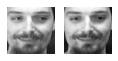

n_cluster : 67


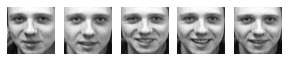

n_cluster : 68


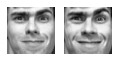

n_cluster : 69


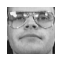

n_cluster : 70


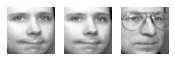

n_cluster : 71


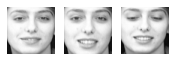

n_cluster : 72


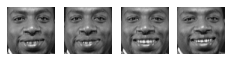

n_cluster : 73


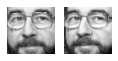

n_cluster : 74


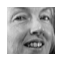

n_cluster : 75


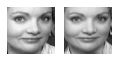

n_cluster : 76


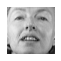

n_cluster : 77


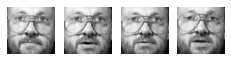

n_cluster : 78


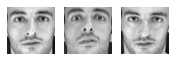

n_cluster : 79


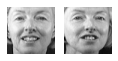

n_cluster : 80


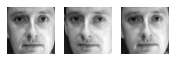

n_cluster : 81


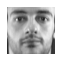

n_cluster : 82


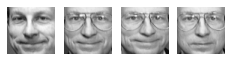

n_cluster : 83


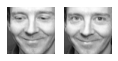

n_cluster : 84


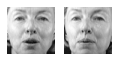

n_cluster : 85


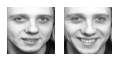

n_cluster : 86


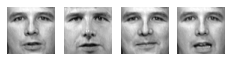

n_cluster : 87


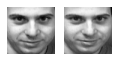

n_cluster : 88


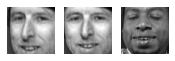

n_cluster : 89


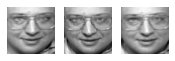

n_cluster : 90


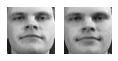

n_cluster : 91


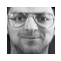

n_cluster : 92


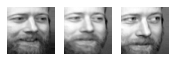

n_cluster : 93


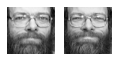

n_cluster : 94


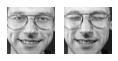

n_cluster : 95


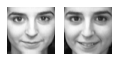

n_cluster : 96


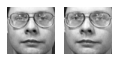

n_cluster : 97


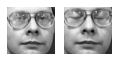

n_cluster : 98


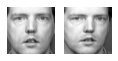

n_cluster : 99


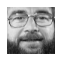

n_cluster : 100


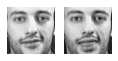

n_cluster : 101


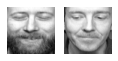

n_cluster : 102


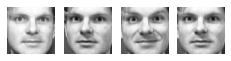

n_cluster : 103


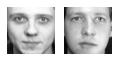

n_cluster : 104


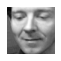

n_cluster : 105


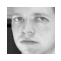

n_cluster : 106


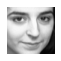

n_cluster : 107


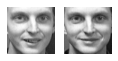

n_cluster : 108


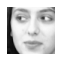

n_cluster : 109


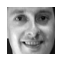

In [349]:
def plot_faces(X, max_n_col=10):
    
    nrow = (X.shape[0] - 1)//max_n_col + 1
    figure = plt.figure(figsize=(max_n_col, nrow))
    
    for ind, face in enumerate(X):
        plt.subplot(nrow, max_n_col, ind+1)
        plt.imshow(face.reshape(img_size), cmap = 'gray')
        plt.axis('Off')
    
    plt.show()


for i in range((best_k+1)*5):
    print(f'n_cluster : {i}')
    in_cluster = y_train_newlabel == i
    
    X_train_incluster = X_train[in_cluster]
    plot_faces(X_train_incluster)
    

## Train ML to predict this data

In [265]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [350]:
svc = SVC()
svc.fit(X_train_pca, y_train)

SVC()

In [351]:
forest = RandomForestClassifier()
forest.fit(X_train_pca, y_train)

RandomForestClassifier()

In [352]:
svc.score(X_test_pca, y_test)

0.9375

In [353]:
forest.score(X_test_pca, y_test)

0.925

### Implement KMeans as preprocessing

In [287]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

In [354]:
svc_pipe = Pipeline([
    ('preprocessor', MiniBatchKMeans(n_clusters = 40)),
    ('predictor', SVC())
])

params_dict = {'preprocessor__n_clusters':[60, 70, 80, 90, 100, 110, 120, 130]}

gridcv_pipe = GridSearchCV(svc_pipe, params_dict)

In [355]:
gridcv_pipe.fit(X_train_pca, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        MiniBatchKMeans(n_clusters=40)),
                                       ('predictor', SVC())]),
             param_grid={'preprocessor__n_clusters': [60, 70, 80, 90, 100, 110,
                                                      120, 130]})

Try concat the reduced data to original data

In [356]:
gridcv_pipe.best_estimator_.score(X_test_pca, y_test)

0.65

In [357]:
gridcv_pipe.best_score_

0.6625

In [364]:
gridcv_pipe.best_params_

{'preprocessor__n_clusters': 100}

**It seems that the score is much lower!**  
Let's try on randomforest

In [358]:
forest_pipe = Pipeline([
    ('preprocessor', MiniBatchKMeans(n_clusters = 40)),
    ('predictor', RandomForestClassifier())
])

params_dict = {'preprocessor__n_clusters':[60, 70, 80, 90, 100, 110, 120, 130]}

gridcv_forest_pipe = GridSearchCV(forest_pipe, params_dict)

In [359]:
gridcv_forest_pipe.fit(X_train_pca, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        MiniBatchKMeans(n_clusters=40)),
                                       ('predictor',
                                        RandomForestClassifier())]),
             param_grid={'preprocessor__n_clusters': [60, 70, 80, 90, 100, 110,
                                                      120, 130]})

In [361]:
gridcv_forest_pipe.best_estimator_.score(X_test_pca, y_test)

0.7875

In [362]:
gridcv_forest_pipe.best_score_

0.83125

In [363]:
gridcv_forest_pipe.best_params_

{'preprocessor__n_clusters': 120}

In [369]:
best_km = gridcv_forest_pipe.best_estimator_.named_steps['preprocessor']

Concat reduced data to the original data

In [376]:
X_train_pca_reduced = best_km.transform(X_train_pca)
X_train_concat = np.c_[X_train_pca, X_train_pca_reduced]

X_test_pca_reduced = best_km.transform(X_test_pca)
X_test_concat = np.c_[X_test_pca, X_test_pca_reduced]

In [380]:
forest.fit(X_train_concat, y_train)

RandomForestClassifier()

In [382]:
forest.score(X_test_concat, y_test)

0.8625

## Apply Gaussian Mixture to generate new faces!

In [383]:
from sklearn.mixture import GaussianMixture

In [421]:
gmm = GaussianMixture(n_components=110)

In [422]:
gmm.fit(X_train_pca)

GaussianMixture(n_components=110)

In [426]:
X_sample = gmm.sample(10)[0]
new_faces = pca.inverse_transform(X_sample)

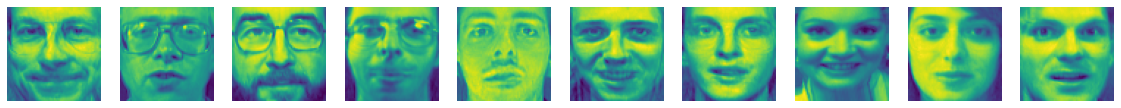

In [427]:
n_col = 10*2
n_row = (10 - 1)//n_col + 1

figure = plt.figure(figsize=(n_col*2, n_row*2))

for ind, face in enumerate(new_faces):
    plt.subplot(n_row, n_col, ind+1)
    plt.imshow(face.reshape(img_size))
    plt.axis('Off')


In [438]:
gmm.score_samples(X_train_pca[100].reshape(1,-1))

array([1323.74899657])

**From the above log-likelihood given X or log P(theta | X).**  
It can be greater than 0, since it is an individual point in continous graph.  
The only restriction is that, integration of the PDF over X domain must equal to 1.  
The more value, the more likely this sample is in the region of high confidence.

### Try generating fake faces to test that GMM can detect it or not!

In [451]:
X_faces = X_train.reshape(-1, img_size[0], img_size[1])

In [459]:
X_faces_flip = np.transpose(X_faces, axes = [0, 2, 1])
print(X_faces_flip.shape)

(320, 64, 64)


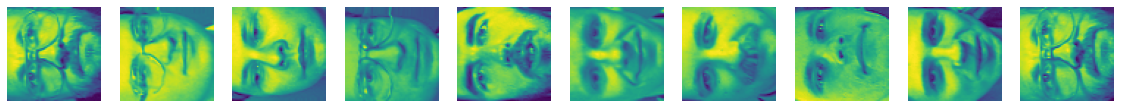

In [460]:
new_flip_faces = X_faces_flip[:10]

n_col = 10*2
n_row = (10 - 1)//n_col + 1

figure = plt.figure(figsize=(n_col*2, n_row*2))

for ind, face in enumerate(new_flip_faces):
    plt.subplot(n_row, n_col, ind+1)
    plt.imshow(face)
    plt.axis('Off')


In [465]:
X_faces_flip_pca = pca.transform(X_faces_flip[:10].reshape(-1, 4096))

In [469]:
gmm.score_samples(X_faces_flip_pca)

array([-44691536.82702491, -54631322.55849866, -33786836.96632947,
       -53885101.43491342, -43218749.80935305, -30013015.048683  ,
       -25011489.13613742, -50571247.12401673, -54567598.32020935,
       -42140746.00165473])

**The value above is very low. It means that the GMM Model is quiet sure that these face is anomaly!**  
Note that this value is log like lihood, if we want to calculate its prob we need to calculate exp(score_samples).

## Anomaly detection using reconstruction error of PCA

In [472]:
def reconstruction_err(pca, X):
    
    X_compress = pca.transform(X)
    X_decompress = pca.inverse_transform(X_compress)
    
    return np.square(X - X_decompress).mean()

In [477]:
print(reconstruction_err(pca, X_train[:5]))

0.00017549179


In [476]:
print(reconstruction_err(pca, X_faces_flip[:5].reshape(-1, 4096)))

0.007103972


**We can see that the reconstruction error of the bad faces is greater than nomal instances around 70 fold.**

In [478]:
X_bad_faces_pca = pca.transform(X_faces_flip[:10].reshape(-1, 4096))
X_bad_faces_reconstruct = pca.inverse_transform(X_bad_faces_pca)

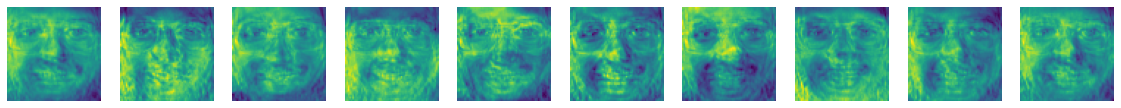

In [479]:
new_flip_faces = X_bad_faces_reconstruct

n_col = 10*2
n_row = (10 - 1)//n_col + 1

figure = plt.figure(figsize=(n_col*2, n_row*2))

for ind, face in enumerate(new_flip_faces):
    plt.subplot(n_row, n_col, ind+1)
    plt.imshow(face.reshape(img_size))
    plt.axis('Off')